<a href="https://colab.research.google.com/github/Adityamalik123/Softmax-Tensorflow/blob/master/MNIST_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
import numpy as np

In [0]:
print(mnist.train.images.shape)

(55000, 784)


In [0]:
print(mnist.test.labels.shape) # Vector of size 10 and 10000 test points

(10000, 10)


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12241961843049026707
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12630658253008205623
physical_device_desc: "device: XLA_CPU device"
]


**PlaceHolders and Variables**

In [0]:
x = tf.placeholder(tf.float32, [None, 784]) # None says we don't know what it will be, we'll choose any number
# We are defining here a 2D tensor
# so x is a placeholder of type float32, which has 784 dimensions and number of such points is now known yet

w = tf.Variable(tf.zeros([784, 10]))
# As we have 784 inputs and here we are considering that we have a softmax which need to produce 10 outputs and hence 784X10
b = tf.Variable(tf.zeros([10]))

In [0]:
y = tf.nn.softmax(tf.matmul(x, w) + b)

In [0]:
y_ = tf.placeholder(tf.float32, [None, 10]) # true label of images

In [0]:
# Defining cross entropy error
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices = [1]))

In [0]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [0]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
for _ in range(1000): # 1000 iterations
  batch_xs, batch_ys = mnist.train.next_batch(100) # Getting mini batch
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [0]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9009


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, y_1, ax, colors=['b']):
  ax.plot(x, y, 'b', label = 'Train Loss')
  ax.plot(x, y_1, 'r', label = 'Test Loss')
  if len(x) == 1:
    plt.legend()
  fig.canvas.draw()


accuracy 0.9046


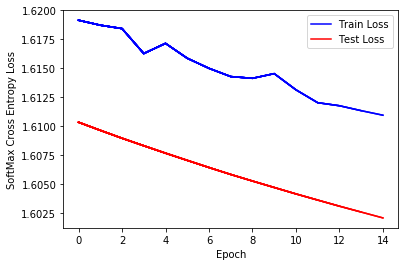

In [0]:
#summarising everything in single file
training_epochs = 15
batch_size = 1000
display_step = 1
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Epoch'); ax.set_ylabel('SoftMax Cross Entropy Loss')
xs, ytrs, ytes = [], [], []

for epoch in range(training_epochs):
  train_avg_cost = 0
  test_avg_cost = 0
  total_batch = int(mnist.train.num_examples/batch_size)
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, c = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    train_avg_cost += c / total_batch
    c = sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    test_avg_cost += c / total_batch

  xs.append(epoch)
  ytrs.append(train_avg_cost)
  ytes.append(test_avg_cost)
  plt_dynamic(xs, ytrs, ytes, ax)

plt_dynamic(xs, ytrs, ytes, ax)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('accuracy', accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))
